In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [74]:
from sklearn import preprocessing
from sklearn.preprocessing import label

from sklearn.cross_validation import train_test_split

from sklearn import tree
from sklearn import metrics

In [3]:
# Load the data
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
                 header=None,
                 names=["buying","maint","doors","persons","lug_boot","safety","eval"])

In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.shape

(1728, 7)

In [6]:
# Check if any data is Nan
df[pd.isnull(df).any(axis=1)]

,buying,maint,doors,persons,lug_boot,safety,eval


In [7]:
df['eval'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: eval, dtype: int64

In [8]:
car_counts = pd.DataFrame(df['eval'].value_counts())

In [9]:
car_counts

,eval
unacc,1210
acc,384
good,69
vgood,65


In [10]:
car_counts['percentage'] = (car_counts['eval'])/(car_counts.sum()[0])
car_counts.sum()

eval          1728.0
percentage       1.0
dtype: float64

In [11]:
car_counts

,eval,percentage
unacc,1210,0.700231
acc,384,0.222222
good,69,0.039931
vgood,65,0.037616


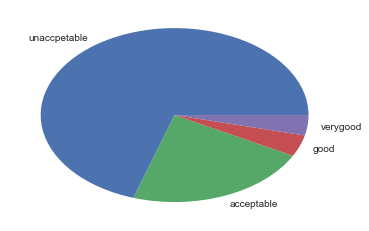

In [12]:
plt.pie(car_counts['percentage'],labels=['unaccpetable','acceptable','good','verygood'])
plt.show()

In [13]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [14]:
le = preprocessing.LabelEncoder()

In [15]:
encoded_buying = le.fit(df['buying'])
encoded_buying.classes_


array(['high', 'low', 'med', 'vhigh'], dtype=object)

In [16]:
encoded_buying.transform(['high'])

array([0], dtype=int64)

In [17]:
encoded_buying.transform(['low'])

array([1], dtype=int64)

In [18]:
encoded_buying.transform(['med'])

array([2], dtype=int64)

In [19]:
encoded_buying.transform(['vhigh'])

array([3], dtype=int64)

In [20]:
encoded_buying.inverse_transform(1)

'low'

In [21]:
for i in range(4):
    print encoded_buying.inverse_transform(i)

high
low
med
vhigh


In [22]:
df['e.buying'] = df['buying'].map(lambda x: encoded_buying.transform([x]))

In [23]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval,e.buying
0,vhigh,vhigh,2,2,small,low,unacc,[3]
1,vhigh,vhigh,2,2,small,med,unacc,[3]
2,vhigh,vhigh,2,2,small,high,unacc,[3]
3,vhigh,vhigh,2,2,med,low,unacc,[3]
4,vhigh,vhigh,2,2,med,med,unacc,[3]


In [24]:
df['e.buying'] = df['e.buying'].map(lambda x: x[0])

In [25]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval,e.buying
0,vhigh,vhigh,2,2,small,low,unacc,3
1,vhigh,vhigh,2,2,small,med,unacc,3
2,vhigh,vhigh,2,2,small,high,unacc,3
3,vhigh,vhigh,2,2,med,low,unacc,3
4,vhigh,vhigh,2,2,med,med,unacc,3


In [26]:
encoded_maint = le.fit(df['maint'])

In [27]:
encoded_maint.classes_


array(['high', 'low', 'med', 'vhigh'], dtype=object)

In [28]:
df['e.maint'] = df['maint'].map(lambda x: encoded_maint.transform([x]))

In [29]:
df['e.maint'] = df['e.maint'].map(lambda x: x[0])

In [30]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval,e.buying,e.maint
0,vhigh,vhigh,2,2,small,low,unacc,3,3
1,vhigh,vhigh,2,2,small,med,unacc,3,3
2,vhigh,vhigh,2,2,small,high,unacc,3,3
3,vhigh,vhigh,2,2,med,low,unacc,3,3
4,vhigh,vhigh,2,2,med,med,unacc,3,3


In [31]:
df = df.drop(['e.buying'],axis=1)
df= df.drop(['e.maint'],axis=1)
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [32]:
def encode_col(col_name):
    new_column_name = "e."+col_name
    encoded_cols = le.fit(df[col_name])
    print(encoded_cols)
    df[new_column_name] = df[col_name].map(lambda x: encoded_cols.transform([x]))
    df[new_column_name] = df[new_column_name].map(lambda x: x[0])


In [33]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [34]:
for col_name in df.columns:
    
    print col_name
    encode_col(col_name)

buying
LabelEncoder()
maint
LabelEncoder()
doors
LabelEncoder()
persons
LabelEncoder()
lug_boot
LabelEncoder()
safety
LabelEncoder()
eval
LabelEncoder()


In [35]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval,e.buying,e.maint,e.doors,e.persons,e.lug_boot,e.safety,e.eval
0,vhigh,vhigh,2,2,small,low,unacc,3,3,0,0,2,1,2
1,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,2,2,2
2,vhigh,vhigh,2,2,small,high,unacc,3,3,0,0,2,0,2
3,vhigh,vhigh,2,2,med,low,unacc,3,3,0,0,1,1,2
4,vhigh,vhigh,2,2,med,med,unacc,3,3,0,0,1,2,2


In [40]:
pd.DataFrame(df['eval'].value_counts())

,eval
unacc,1210
acc,384
good,69
vgood,65


In [39]:
pd.DataFrame(df['e.eval'].value_counts())

,e.eval
2,1210
0,384
1,69
3,65


In [47]:
X=df.iloc[:,7:13]
X.head()
X.shape

(1728, 6)

In [48]:
y=df.iloc[:,13]
y.head()
y.shape

(1728L,)

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=5)

In [51]:
x_train.shape

(1296, 6)

In [52]:
x_test.shape

(432, 6)

In [53]:
y_train.shape

(1296L,)

In [54]:
y_test.shape

(432L,)

In [61]:
x_train.columns


Index([u'e.buying', u'e.maint', u'e.doors', u'e.persons', u'e.lug_boot',
       u'e.safety'],
      dtype='object')

In [63]:
y_train_m = pd.DataFrame(y_train)
y_train_m['e.eval'].value_counts()

2    899
0    286
1     57
3     54
Name: e.eval, dtype: int64

In [64]:
y_test_m = pd.DataFrame(y_test)
y_test_m['e.eval'].value_counts()

2    311
0     98
1     12
3     11
Name: e.eval, dtype: int64

In [69]:
clf_dt = tree.DecisionTreeClassifier(random_state=10)
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=10, splitter='best')

In [70]:
y_pred = clf_dt.predict(x_test)
y_pred

array([0, 2, 0, 0, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2,
       2, 3, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 3, 2, 2, 1, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 3,

In [75]:
print(metrics.accuracy_score(y_test,y_pred))

0.965277777778


In [81]:
#print(x_train.head())
print(x_test.head())
print(y_test.head())
print(y_pred[0:5])


      e.buying  e.maint  e.doors  e.persons  e.lug_boot  e.safety
805          0        1        1          2           1         2
50           3        3        1          2           1         0
1171         2        2        3          1           2         2
1177         2        2        3          1           0         2
395          3        1        2          1           0         0
805     0
50      2
1171    0
1177    0
395     0
Name: e.eval, dtype: int64
[0 2 0 0 0]
